<sub>AIST1110 Introduction to Computing Using Python<br/>
2022-23 Term 1 Department of Computer Science and Engineering, The Chinese University of Hong Kong</sub>

# **Assignment 3**

Instructions:
1. You may define extra functions if you see fit for solving any question.
2. Remember to disable or remove testing/debugging code before submission.
3. Unless specified otherwise in the question, don't use other third-party packages that can easily solve the problems apart from the necessary packages like NumPy, SciPy, Pandas, and Matplotlib.

## **Question 1 - A Decorator of Recursive Functions (xx%)**

Suppose that we have some recursive functions for n >= 0 like these:
```python
def factorial(n):
    if n == 0:
        return 1
    return n * factorial(n-1)
```
```python
def fib(n):
    if n < 2: # base case: n = 0 or 1
        return n
    return fib(n-1) + fib(n-2)
```
It could be hard for beginners to understand how recursion works. Showing the full trace of function calls happened behind the scene could be helpful then. If we want to trace all the calls to the `fib` function, we can write a ***higher order function (a decorator)*** named `trace()` to return a new function, which prints information like the name of the function being called, argument(s) received and the return value(s) whenever the `fib` function is called.

To make the output more readable, the `trace()` function should indent the output at each depth of function call, and it should support an arbitrary number of arguments. No need to test the program for too many arguments or too big problem sizes. A handful of arguments and n <= 10 are already enough or else your output could not be shown properly to the screen.

**Sample Runs**

```python
factorial = trace(factorial)
print(factorial(4))
```
This code is expected to generate the following output to the console:
```
|-> factorial 4
|   |-> factorial 3
|   |   |-> factorial 2
|   |   |   |-> factorial 1
|   |   |   |   |-> factorial 0
|   |   |   |   |   |<- return 1
|   |   |   |   |<- return 1
|   |   |   |<- return 2
|   |   |<- return 6
|   |<- return 24
24
```

Another way or syntactic sugar to use the trace() function is to use the function decorator syntax as follows:

```python
@trace
def fib(n):
    if n < 2: # base case: n = 0 or 1
        return n
    return fib(n-1) + fib(n-2)

print(fib(4))
```

This code is expected to generate the following output to the console:
```
|-> fib 4
|   |-> fib 3
|   |   |-> fib 2
|   |   |   |-> fib 1
|   |   |   |   |<- return 1
|   |   |   |-> fib 0
|   |   |   |   |<- return 0
|   |   |   |<- return 1
|   |   |-> fib 1
|   |   |   |<- return 1
|   |   |<- return 2
|   |-> fib 2
|   |   |-> fib 1
|   |   |   |<- return 1
|   |   |-> fib 0
|   |   |   |<- return 0
|   |   |<- return 1
|   |<- return 3
3
```
(Every line has a newline character at the end and no trailing space.)



In [1]:
# TODO: Add your trace function implementation here
def trace(func):
    trace.depth = 0
    def f(*args):
        into = '|-> '
        outo = '|<- '
        space = '|   '
        print((space * trace.depth) + into, end='')
        trace.depth += 1
        print(func.__name__, end=' ')
        for i in args:
            print(i, end='')
        print()
        out = func(*args)
        print(space * trace.depth + outo, end = '')
        trace.depth -= 1
        print(f"return {out}")
        return out
    return f

Some testing code snippets are provided below. Feel free to add more code cells yourself for further testing.

In [2]:
@trace
def factorial(n):
    if n == 0:
        return 1
    return n * factorial(n-1)

In [3]:
print(factorial(7))

|-> factorial 7
|   |-> factorial 6
|   |   |-> factorial 5
|   |   |   |-> factorial 4
|   |   |   |   |-> factorial 3
|   |   |   |   |   |-> factorial 2
|   |   |   |   |   |   |-> factorial 1
|   |   |   |   |   |   |   |-> factorial 0
|   |   |   |   |   |   |   |   |<- return 1
|   |   |   |   |   |   |   |<- return 1
|   |   |   |   |   |   |<- return 2
|   |   |   |   |   |<- return 6
|   |   |   |   |<- return 24
|   |   |   |<- return 120
|   |   |<- return 720
|   |<- return 5040
5040


In [4]:
@trace
def fib(n):
    if n < 2: # base case: n = 0 or 1
        return n
    return fib(n-1) + fib(n-2)

In [5]:
print(fib(4))

|-> fib 4
|   |-> fib 3
|   |   |-> fib 2
|   |   |   |-> fib 1
|   |   |   |   |<- return 1
|   |   |   |-> fib 0
|   |   |   |   |<- return 0
|   |   |   |<- return 1
|   |   |-> fib 1
|   |   |   |<- return 1
|   |   |<- return 2
|   |-> fib 2
|   |   |-> fib 1
|   |   |   |<- return 1
|   |   |-> fib 0
|   |   |   |<- return 0
|   |   |<- return 1
|   |<- return 3
3


In [6]:
print([fib(i) for i in range(5)])

|-> fib 0
|   |<- return 0
|-> fib 1
|   |<- return 1
|-> fib 2
|   |-> fib 1
|   |   |<- return 1
|   |-> fib 0
|   |   |<- return 0
|   |<- return 1
|-> fib 3
|   |-> fib 2
|   |   |-> fib 1
|   |   |   |<- return 1
|   |   |-> fib 0
|   |   |   |<- return 0
|   |   |<- return 1
|   |-> fib 1
|   |   |<- return 1
|   |<- return 2
|-> fib 4
|   |-> fib 3
|   |   |-> fib 2
|   |   |   |-> fib 1
|   |   |   |   |<- return 1
|   |   |   |-> fib 0
|   |   |   |   |<- return 0
|   |   |   |<- return 1
|   |   |-> fib 1
|   |   |   |<- return 1
|   |   |<- return 2
|   |-> fib 2
|   |   |-> fib 1
|   |   |   |<- return 1
|   |   |-> fib 0
|   |   |   |<- return 0
|   |   |<- return 1
|   |<- return 3
[0, 1, 1, 2, 3]


In [7]:
@trace
def partitions(n, m):
    """Count the ways to partition n using parts up to m, (m <= n)."""
    if n == m:
        return 1 + partitions(n, m-1)
    elif m == 0 or n < 0:
        return 0
    elif n == 0 or m == 1:
        return 1
    else:
        return partitions(n, m-1) + partitions(n-m, m)

In [8]:
print(partitions(4, 3))

|-> partitions 43
|   |-> partitions 42
|   |   |-> partitions 41
|   |   |   |<- return 1
|   |   |-> partitions 22
|   |   |   |-> partitions 21
|   |   |   |   |<- return 1
|   |   |   |<- return 2
|   |   |<- return 3
|   |-> partitions 13
|   |   |-> partitions 12
|   |   |   |-> partitions 11
|   |   |   |   |-> partitions 10
|   |   |   |   |   |<- return 0
|   |   |   |   |<- return 1
|   |   |   |-> partitions -12
|   |   |   |   |<- return 0
|   |   |   |<- return 1
|   |   |-> partitions -23
|   |   |   |<- return 0
|   |   |<- return 1
|   |<- return 4
4


## **Question 2 - Simple Charting (xx%)**
Plot the following chart using Matplotlib. Use 50 evenly spaced samples between $-\pi$ and $\pi$, inclusively, as the $x$ values. The chart uses the "ggplot" style. You may need to find out how to set the style of a plot.

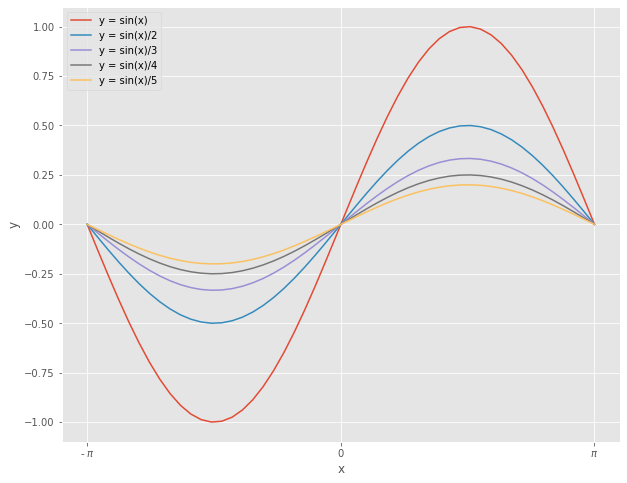

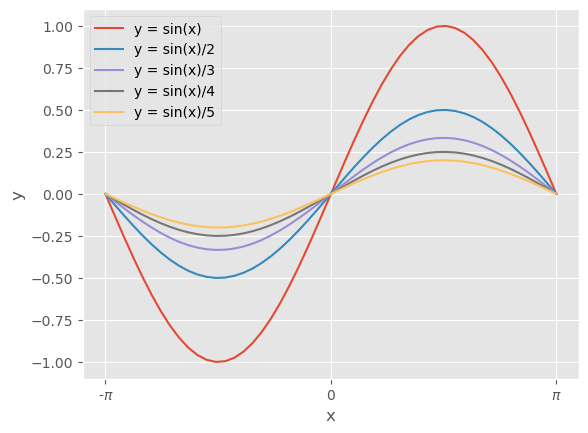

In [52]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig, ax = plt.subplots()
x = np.linspace((-1)*np.pi, np.pi, 50)
for i in range(1,6):
    temp = np.sin(x) / i
    plt.plot(x,temp, label=f'y = sin(x)' if i == 1 else f'y = sin(x)/{i}')
plt.legend(loc="upper left")
#ax.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: f'{val/np.pi}$\pi$' if val !=0 else '0'))
#ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.set_xticks([(-1) * np.pi, 0, np.pi], labels=['-$\pi$', '0', '$\pi$'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()




## **Question 3, 4, ... to come very soon**
